In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df= pd.read_csv("Groceriesdata.csv")
df.shape

(38765, 7)

In [3]:
df.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,7/21/2015,tropical fruit,2015,7,21,1
1,2552,5/1/2015,whole milk,2015,5,1,4
2,2300,9/19/2015,pip fruit,2015,9,19,5
3,1187,12/12/2015,other vegetables,2015,12,12,5
4,3037,1/2/2015,whole milk,2015,1,2,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
 3   year             38765 non-null  int64 
 4   month            38765 non-null  int64 
 5   day              38765 non-null  int64 
 6   day_of_week      38765 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 2.1+ MB


In [5]:
df = df.drop(columns=['year', 'month','day','day_of_week'])

In [6]:
df.head()

,Member_number,Date,itemDescription
0,1808,7/21/2015,tropical fruit
1,2552,5/1/2015,whole milk
2,2300,9/19/2015,pip fruit
3,1187,12/12/2015,other vegetables
4,3037,1/2/2015,whole milk


In [7]:
df.isnull().sum().sort_values(ascending=False)

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [8]:
df['Date']=pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


In [9]:
df.head()

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-05-01,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-01-02,whole milk


In [10]:
item_distr=df.groupby(by='itemDescription').size().reset_index(name='Frequency counts').sort_values(by='Frequency counts',ascending=False)

In [11]:
item_distr.head(10)

,itemDescription,Frequency counts
164,whole milk,2502
102,other vegetables,1898
122,rolls/buns,1716
138,soda,1514
165,yogurt,1334
123,root vegetables,1071
156,tropical fruit,1032
12,bottled water,933
130,sausage,924
30,citrus fruit,812


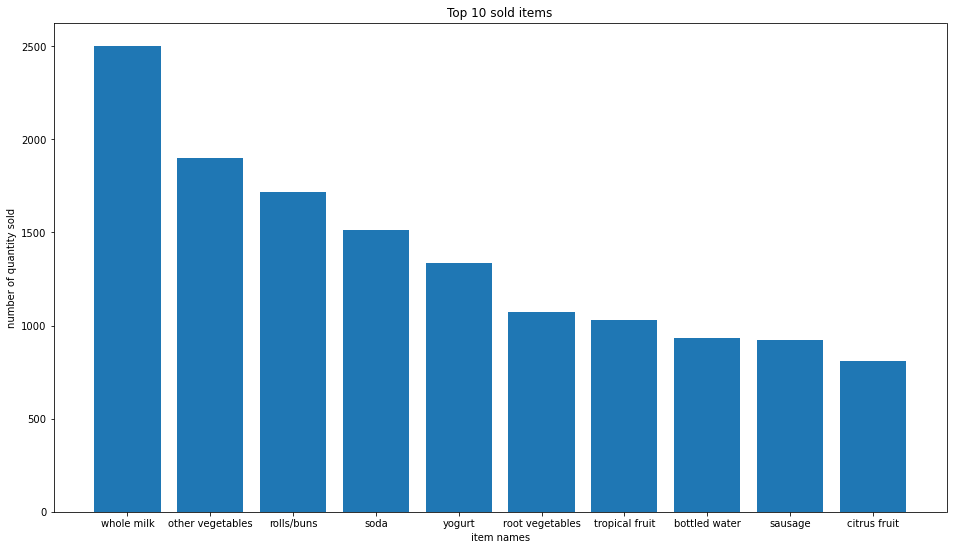

In [12]:
bars=df['itemDescription'].value_counts().values
height=df['itemDescription'].value_counts().index
x_pos=np.arange(len(bars))

plt.figure(figsize=(16,9))
plt.bar(height[0:10],bars[0:10])

plt.title("Top 10 sold items")
plt.xlabel("item names")
plt.ylabel("number of quantity sold")
plt.show()

In [13]:
df_date=df.set_index(['Date'])
df_date

,Member_number,itemDescription
Date,,
2015-07-21,1808,tropical fruit
2015-05-01,2552,whole milk
2015-09-19,2300,pip fruit
2015-12-12,1187,other vegetables
2015-01-02,3037,whole milk
...,...,...
2014-08-10,4471,sliced cheese
2014-02-23,2022,candy
2014-04-16,1097,cake bar


[Text(0.5, 0, 'date'), Text(0, 0.5, 'number of items sold')]

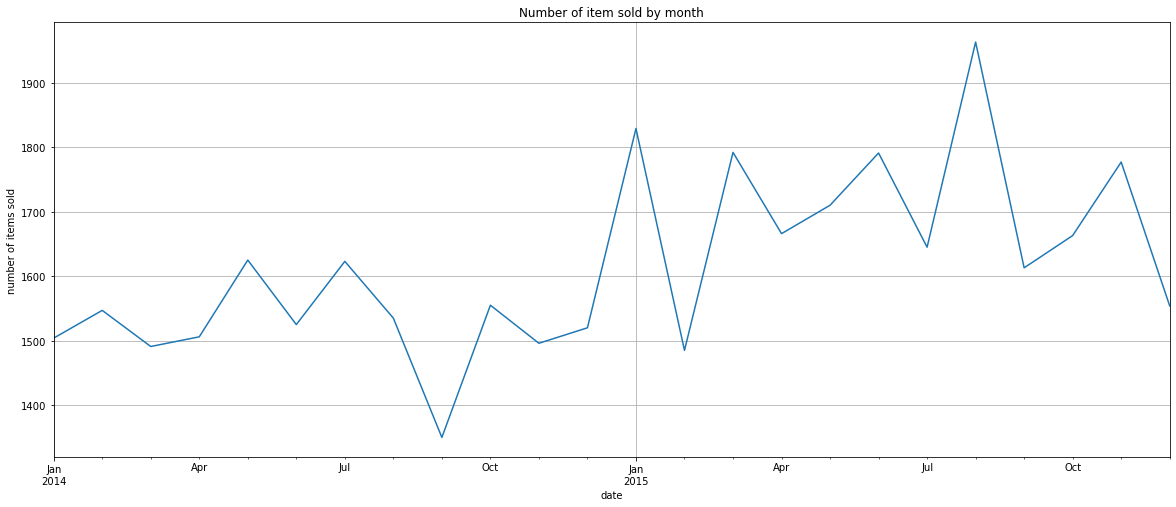

In [14]:
df_date.resample("M")['itemDescription'].count().plot(figsize=(20,8),grid=True,title='Number of item sold by month').set(xlabel="date",ylabel="number of items sold")

In [15]:
cust_level=df[['Member_number','itemDescription']].sort_values(by='Member_number',ascending=False)
cust_level['itemDescription']=cust_level['itemDescription'].str.strip()
cust_level

,Member_number,itemDescription
3578,5000,soda
34885,5000,semi-finished bread
11728,5000,fruit/vegetable juice
9340,5000,bottled beer
19727,5000,root vegetables
...,...,...
13331,1000,whole milk
17778,1000,pickled vegetables
6388,1000,sausage
20992,1000,semi-finished bread


In [16]:
transactions=[a[1]['itemDescription'].tolist() for a in list(cust_level.groupby(['Member_number']))]

In [17]:
print(transactions)

[['misc. beverages', 'sausage', 'soda', 'yogurt', 'salty snack', 'pastry', 'canned beer', 'hygiene articles', 'whole milk', 'pickled vegetables', 'sausage', 'semi-finished bread', 'whole milk'], ['beef', 'sausage', 'frankfurter', 'soda', 'whipped/sour cream', 'frankfurter', 'rolls/buns', 'soda', 'white bread', 'whole milk', 'whole milk', 'curd'], ['specialty chocolate', 'butter', 'whole milk', 'butter milk', 'tropical fruit', 'sugar', 'other vegetables', 'frozen vegetables'], ['dental care', 'rolls/buns', 'rolls/buns', 'frozen meals', 'rolls/buns', 'sausage', 'detergent', 'root vegetables'], ['frozen fish', 'shopping bags', 'hygiene articles', 'rolls/buns', 'whole milk', 'canned beer', 'root vegetables', 'tropical fruit', 'whole milk', 'chocolate', 'other vegetables', 'red/blush wine', 'pastry', 'rolls/buns', 'packaged fruit/vegetables', 'dish cleaner', 'pip fruit', 'other vegetables', 'chocolate', 'cling film/bags', 'whole milk'], ['rolls/buns', 'rolls/buns', 'margarine', 'whipped/sou

In [18]:
from apyori import apriori
rules=apriori(transactions=transactions,min_support=0.002, min_confidence=0.05,min_lift=3,min_length=2)

In [19]:
results=list(rules)

In [20]:
results

[RelationRecord(items=frozenset({'kitchen towels', 'UHT-milk'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'kitchen towels'}), items_add=frozenset({'UHT-milk'}), confidence=0.30000000000000004, lift=3.821568627450981)]),
 RelationRecord(items=frozenset({'beef', 'potato products'}), support=0.002565418163160595, ordered_statistics=[OrderedStatistic(items_base=frozenset({'potato products'}), items_add=frozenset({'beef'}), confidence=0.4545454545454546, lift=3.8021849395239955)]),
 RelationRecord(items=frozenset({'canned fruit', 'coffee'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'canned fruit'}), items_add=frozenset({'coffee'}), confidence=0.4285714285714286, lift=3.7289540816326534)]),
 RelationRecord(items=frozenset({'meat spreads', 'domestic eggs'}), support=0.0035915854284248334, ordered_statistics=[OrderedStatistic(items_base=frozenset({'meat spreads'}), items_add=frozenset({'domestic egg

In [21]:
def inspect(results):
    lhs=[tuple(result[2][0][0])[0] for result in results]
    rhs=[tuple(result[2][0][1])[0] for result in results]
    supports=[result[1] for result in results]
    confidences=[result[2][0][2] for result in results]
    lifts=[result[2][0][3] for result in results]
    return list(zip(lhs,rhs,supports,confidences,lifts))
resultsindataframe=pd.DataFrame(inspect(results),columns=['left hand side','right hand side','support','confidence','lift'])

In [22]:
resultsindataframe.nlargest(n=10,columns='lift')

,left hand side,right hand side,support,confidence,lift
4915,bottled water,yogurt,0.002052,0.105263,14.654135
4914,bottled water,pip fruit,0.002052,0.105263,12.068111
2674,oil,soda,0.002052,0.242424,11.524021
3573,brown bread,yogurt,0.002052,0.073394,11.443670
4133,citrus fruit,meat,0.002052,0.148148,11.105413
3290,bottled water,soda,0.002052,0.150943,10.322410
2904,brown bread,other vegetables,0.002309,0.097826,9.533152
5045,bottled water,pastry,0.002052,0.135593,9.438257
2902,brown bread,pastry,0.002052,0.086957,9.415459
2734,bottled water,brown bread,0.002309,0.118421,9.232105


In [23]:
gfg_csv_data = resultsindataframe.to_csv('GfG.csv', index = True)

In [24]:
final_df_4=resultsindataframe[resultsindataframe.support>=0.001]

In [25]:
final_df_4

,left hand side,right hand side,support,confidence,lift
0,kitchen towels,UHT-milk,0.002309,0.300000,3.821569
1,potato products,beef,0.002565,0.454545,3.802185
2,canned fruit,coffee,0.002309,0.428571,3.728954
3,meat spreads,domestic eggs,0.003592,0.400000,3.004239
4,flour,mayonnaise,0.002309,0.063380,3.338599
...,...,...,...,...,...
5341,bottled water,other vegetables,0.002565,0.052083,5.800595
5342,bottled water,yogurt,0.002309,0.062937,3.661622
5343,bottled water,yogurt,0.002052,0.079208,4.608246
5344,bottled water,yogurt,0.002052,0.087912,5.114647


In [26]:
resultsindataframe[resultsindataframe['left hand side']=='kitchen towels']

,left hand side,right hand side,support,confidence,lift
0,kitchen towels,UHT-milk,0.002309,0.300000,3.821569
281,kitchen towels,other vegetables,0.002565,0.333333,3.589319
282,kitchen towels,whipped/sour cream,0.002052,0.266667,3.982631
